# Régression du prix de diamants (Dataset Diamonds)

cf. https://www.kaggle.com/datasets/shivam2503/diamonds<br>
cf. https://github.com/BahramJannesar/DiamondsMachineLearning/tree/master

Le dataset contient les prix et d'autres attributs de 53 940 diamants pour un total de 9 variables explicatives potentielles et la variable cible (le prix du diamant).

**Description des attributs**:

- `price` valeur numérique entière exprimée en dollars US (326 à 18 823). C'est la colonne cible. 

**Les 4 caractéristiques principales des diamants (4C):**

- `carat` (valeur décimale de 0.2 à 5.01)<br>
Le carat est le poids physique du diamant mesuré en *carats*. Un carat équivaut à 1/5 de gramme et se subdivise en 100 points. Le poids en carat est la note la plus objective des 4C.
<br>
- `cut` (modalités littérales parmi les valeurs 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal')<br>
Pour déterminer la qualité de la coupe, le calibreur de diamants évalue l'habileté du tailleur à façonner le diamant. Plus le diamant est taillé avec précision, plus le diamant est captivant pour les yeux.
<br>
- `color` (modalités littérales parmi les valeurs 'J' (pire) à 'D' (meilleur), dans l'ordre décroissant des lettres alphabétiques)<br>
La couleur relative à la qualité de type gemme se présente sous de nombreuses nuances. Dans la gamme allant de l'incolore au jaune clair ou au brun clair. Les diamants incolores sont les plus rares. D'autres couleurs naturelles (bleu, rouge, rose par exemple) sont dites "fancy", et leur gradation de couleur est différente de celle des diamants blancs incolores.
<br>
- `clarity` (modalités littérales parmi 'I1' (pire), 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF' (meilleure))<br>
Les diamants peuvent avoir des caractéristiques internes appelées *inclusions* ou des caractéristiques externes appelées *imperfections*. Les diamants sans inclusions ni imperfections sont rares ; cependant, la plupart des caractéristiques ne peuvent être vues qu'avec un grossissement.
<br>

**Dimensions:**

- `x`  (valeur décimale de 0 à 10.74)<br>
Longueur du diamant exprimée en mm
<br>
- `y`  (valeur décimale de 0 à 58.9)<br>
Largeur du diamant exprimée en mm
<br>
- `z`  (valeur décimale de 0 à 31.8)<br>
profondeur du diamant exprimée en mm


**Proportions principales:**
- `depth` (valeur décimale de 0 à 100)<br>
Profondeur totale exprimée en % à partir de la formule :<br>
    \begin{align}
    depth =2\left ( \frac{z}{x+y} \right )
    \end{align}
La profondeur du diamant est sa hauteur (exprimée en millimètres) mesurée de la *colette* (pointe inférieure) à la *table* (surface plane et supérieure).
<br>
- `table` (valeur décimale de .. à ..)<br>
Elle définit la largeur de *table* du haut du losange par rapport au point le plus large.<br>
La *table* d'un diamant fait référence à la facette plate du diamant vue lorsque la pierre est face vers le haut. Le but principal d'une table en diamant est de réfracter les rayons lumineux entrants et de permettre aux rayons lumineux réfléchis de l'intérieur du diamant de rencontrer l'œil de l'observateur. Le diamant taillé sur table idéal donnera au diamant un feu et un éclat époustouflants.

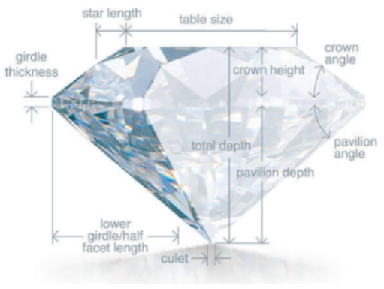

### Import des packages Python

In [2]:
# Analyse numérique et manipulation de données
import numpy as np
import pandas as pd

# Graphique
import matplotlib.pyplot as plt
import seaborn as sns

# Modélisation
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Préparation des données : standardisation des données
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

# Mesure des performances
from sklearn.metrics import *   # dont mean_squared_error

# Package scipy : Coefficient de détermination (Pearson) et coefficient de corrélation de rang de Spearman
from scipy.stats import pearsonr, spearmanr

# Temps d'exécution
from datetime import timedelta, datetime
from timeit import timeit
from timeit import default_timer as timer  # prise de chrono

In [3]:
# Modélisation prédictive à l'aide d'algorithmes ensemblistes (arbres de régression et algorithme de détection de outliers)
# régression linéaire, perceptron simple ou multicouches
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, IsolationForest
from sklearn.tree import DecisionTreeRegressor
from sklearn import neural_network
from sklearn.neighbors import NearestNeighbors

In [4]:
import sklearn as skl
print("[Version sklearn] : ", skl.__version__)
print("[Version numpy] : ", np.__version__)
print("[Version pandas] : ", pd.__version__)

[Version sklearn] :  1.4.2
[Version numpy] :  1.26.4
[Version pandas] :  2.2.2


### Définition des fonctions locales

In [5]:
def plot_res(metric, unit='RMSE', alpha=0.1, mdl='Ridge', split='train'):
    print(80*'=')
    print("["+mdl+"] : "+unit+" en "+split.upper(), round(metric, 2), " avec alpha=", alpha)

def f_rmse(y_true, y_pred):
    ''' Mesure de la racine de l erreur quadratique moyenne entre les valeurs prédites et les valeurs observées
        Usage : err = f_rmse(y_pred, y_true)'''
    return np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 3)

def f_mape(y_true, y_pred):
    ''' Mesure de l'erreur moyenne absolue exprimée en pourcentage entre les valeurs prédites et les valeurs observées
        Usage : err = f_mape(y_true, y_pred)'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.round(100*np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps) )), 3)

def f_smape(y_true, y_pred):
    ''' Mesure de l'erreur moyenne absolue symétrique exprimée en pourcentage entre les valeurs prédites et les valeurs observées
        Usage : err = f_smape(y_true, y_pred)'''
    smape = np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)) + np.finfo(float).eps)
    return np.round(100/len(y_true) * smape,3)

def f_mae(y_true, y_pred):
    ''' Mesure de l'erreur moyenne absolue entre les valeurs prédites (y_pred) et les valeurs observées (y_true)
        Usage : err = f_mae(y_true, y_pred)''' 
    from sklearn.metrics import mean_absolute_error
    return np.round(mean_absolute_error(y_true, y_pred),3)

In [6]:
def f_model(model, scaler, Xtrain, ytrain, Xtest, ytest, val_max=1):
    # Initialisation du modele et entrainement sur les données du dataset TRAIN
    mdl = model
    mdl.fit(Xtrain, ytrain)
    
    # Prediction sur le dataset TRAIN
    y_pred_train = mdl.predict(Xtrain)
    # Prediction sur le dataset TEST
    y_pred_test = mdl.predict(Xtest)

    # Opération de standardisation inverse sur les résultats
    if scaler == 'log':
        print("Application x=exp(y-1)")
        ytrain = np.expm1(ytrain)
        ytest = np.expm1(ytest)
        y_pred_train = np.expm1(y_pred_train)
        y_pred_test = np.expm1(y_pred_test)
    elif scaler == 'max':
        ytrain = val_max * ytrain
        ytest = val_max * ytest
        y_pred_train = val_max * y_pred_train
        y_pred_test = val_max * y_pred_test
    else:
        print("Nothing To Do")
        #ytrain = scaler.inverse_transform(ytrain.reshape(-1, 1))
        #ytest = scaler.inverse_transform(ytest.reshape(-1, 1))
        #y_pred_train = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
        #y_pred_test = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
        
    # Evaluation des performances à l'aide de la métrique Mean Squared Error de sklearn
    val_mse_train = np.sqrt(mean_squared_error(ytrain, y_pred_train)).round(3)
    val_mse_test =  np.sqrt(mean_squared_error(ytest, y_pred_test)).round(3)
    print("RMSE [TRAIN] =", val_mse_train, "| [TEST] =", val_mse_test)
    
    # Evaluation des performances à l'aide de la métrique utilisateur MAE
    mae_train, mae_test =  np.round(f_mae(ytrain, y_pred_train), 2), np.round(f_mae(ytest, y_pred_test), 2)
    print("MAE [TRAIN] =", mae_train, "| [TEST] =", mae_test)
    
    # Evaluation des performances à l'aide de la métrique utilisateur MAPE (%)
    mape_train, mape_test =  np.round(f_smape(ytrain, y_pred_train), 2), np.round(f_smape(ytest, y_pred_test), 2)
    print("MAPE [TRAIN] =", mape_train, "| [TEST] =", mape_test)
    
    # Evaluation des performances à l'aide de la métrique R2 ou "Coefficient de Pearson"
    #r2_train, r2_test = np.round(r2_score(ytrain, y_pred_train),2), np.round(r2_score(ytest, y_pred_test),2)
    #print("R2 [TRAIN] =", r2_train, "| [TEST] =", r2_test)
    
    # Evaluation des performances à l'aide de la métrique "Coefficient de Spearman"
    r2_train, _ = np.round(pearsonr(ytrain, y_pred_train), 2)
    r2_test, _ = np.round(pearsonr(ytest, y_pred_test), 2)
    print("R2 [TRAIN] =", r2_train, "| [TEST] =", r2_test)
    
    # Evaluation des performances à l'aide de la métrique "Coefficient de Spearman"
    s_train, _ = np.round(spearmanr(ytrain, y_pred_train), 2)
    s_test, _ = np.round(spearmanr(ytest, y_pred_test), 2)
    print("S [TRAIN] =", s_train, "| [TEST] =", s_test)

    return mdl, val_mse_train, val_mse_test, mae_train, mae_test, mape_train, mape_test, r2_train, r2_test, s_train, s_test

### Définition des constantes du programme

In [7]:
# Constante pour l'initialisation de variables aléatoires
SEED = 123

### Analyse exploratoire : mode opératoire

Pour une analyse complète, nous allons dérouler les étapes d'analyse exploratoire suivante :

* *Statistiques descriptives* : mesures statistiques pour chaque attribut numérique.
* *Analyse de corrélation* : comprendre les relations entre les différentes variables numériques, en particulier leur rapport avec le prix.
* *Analyse groupée* : examiner comment des variables catégorielles telles que la coupe, la couleur et la clarté affectent leur prix.
* *Détection des valeurs aberrantes* : identifier toutes les valeurs aberrantes contenues dans le dataset qui pourraient fausser l'analyse.
* *Visualisations* : créer des graphiques pour représenter visuellement ces relations et les résultats produits.

### Collecte et préparation des données

<div align="left" class="alert-info"><br>

**Consignes** :

1) **Collecter** les données dans le DF Pandas `pdf_diamonds`, lister les attributs présents, fournir un résumé descriptif indiquant le typage des colonnes et la quantité de lignes renseignées par colonne, fournir un extrait.

   La colonne `price` désigne la variable à expliquer du problème de régression du prix du diamant.

2) **Prétraiter** les données :<br>

   Comptabiliser les **valeurs manquantes** (prévoir une stratégie d'imputation en fonction de leur proportion).<br>
   Comptabiliser les **valeurs redondantes** (les éliminer si leur proportion est relativement faible).<br>
   Localiser les **valeurs numériques aberrantes** mais préalablement les **valeurs nulles incohérentes** pour l'étude.<br>
   Adopter la stratégie d'encodage indiquée pour traiter les variables catégorielles composant le dataset.

   Pour les variables catégorielles, mesurer les proportions de chaque valeur présente. Prévoir une stratégie en cas de déséquilibre affiché.<br>
   Encoder la variable cible via la technique de "binning".
   
3) **Sélectionner** les variables pertinentes (enrichir si besoin, trasnformer,...).

4) Utiliser la fonction fournie `f_detect_outliers()` pour détecter les outliers à l'aide de l'algorithme `IsolationForest` de `sklearn` en fixant une valeur de taux de contamination faible (1%, 3%, 5% ?).
</div>

### Lecture des données

On définit le DF Pandas source : `pdf_diamonds`.

In [8]:
pdf_diamonds = pd.read_csv("./data/diamonds.csv")
pdf_diamonds.shape

(53940, 10)

Liste et typologie des attributs :

In [9]:
pdf_diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
# Extrait 
pdf_diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [11]:
pdf_diamonds.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [12]:
pdf_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
